In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes (1).csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [11]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


EDA

<Axes: >

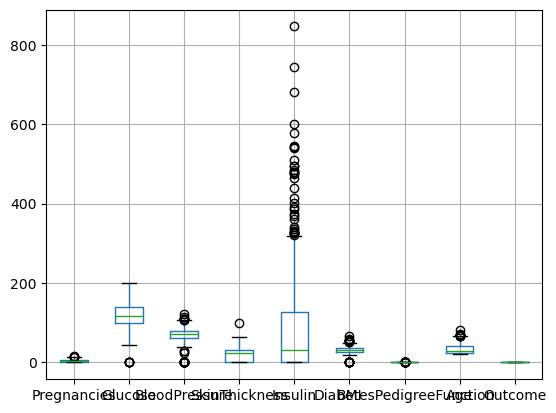

In [18]:
df.boxplot()

In [20]:
def outlier_capping(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_extreme=q1-1.5*iqr
    upper_extreme=q3+1.5*iqr
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(["int","float"]).columns:
    outlier_capping(df,col)

In [22]:
df.boxplot()

<Axes: >

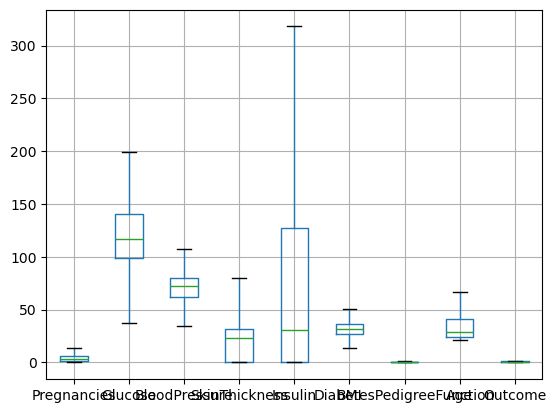

In [24]:
plt.show()

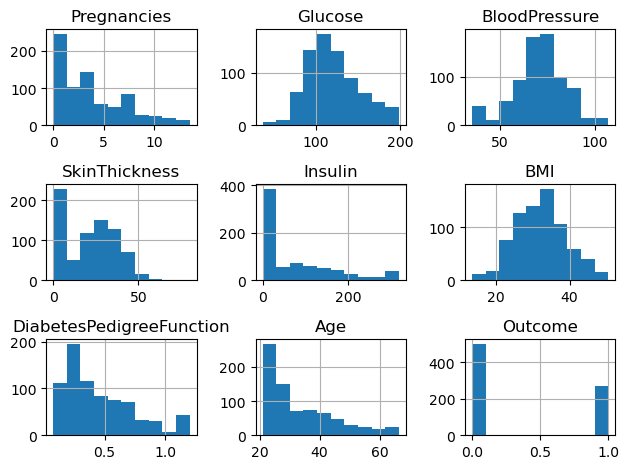

In [26]:
df.hist()
plt.tight_layout()
plt.show()

In [28]:
sns.pairplot(df)

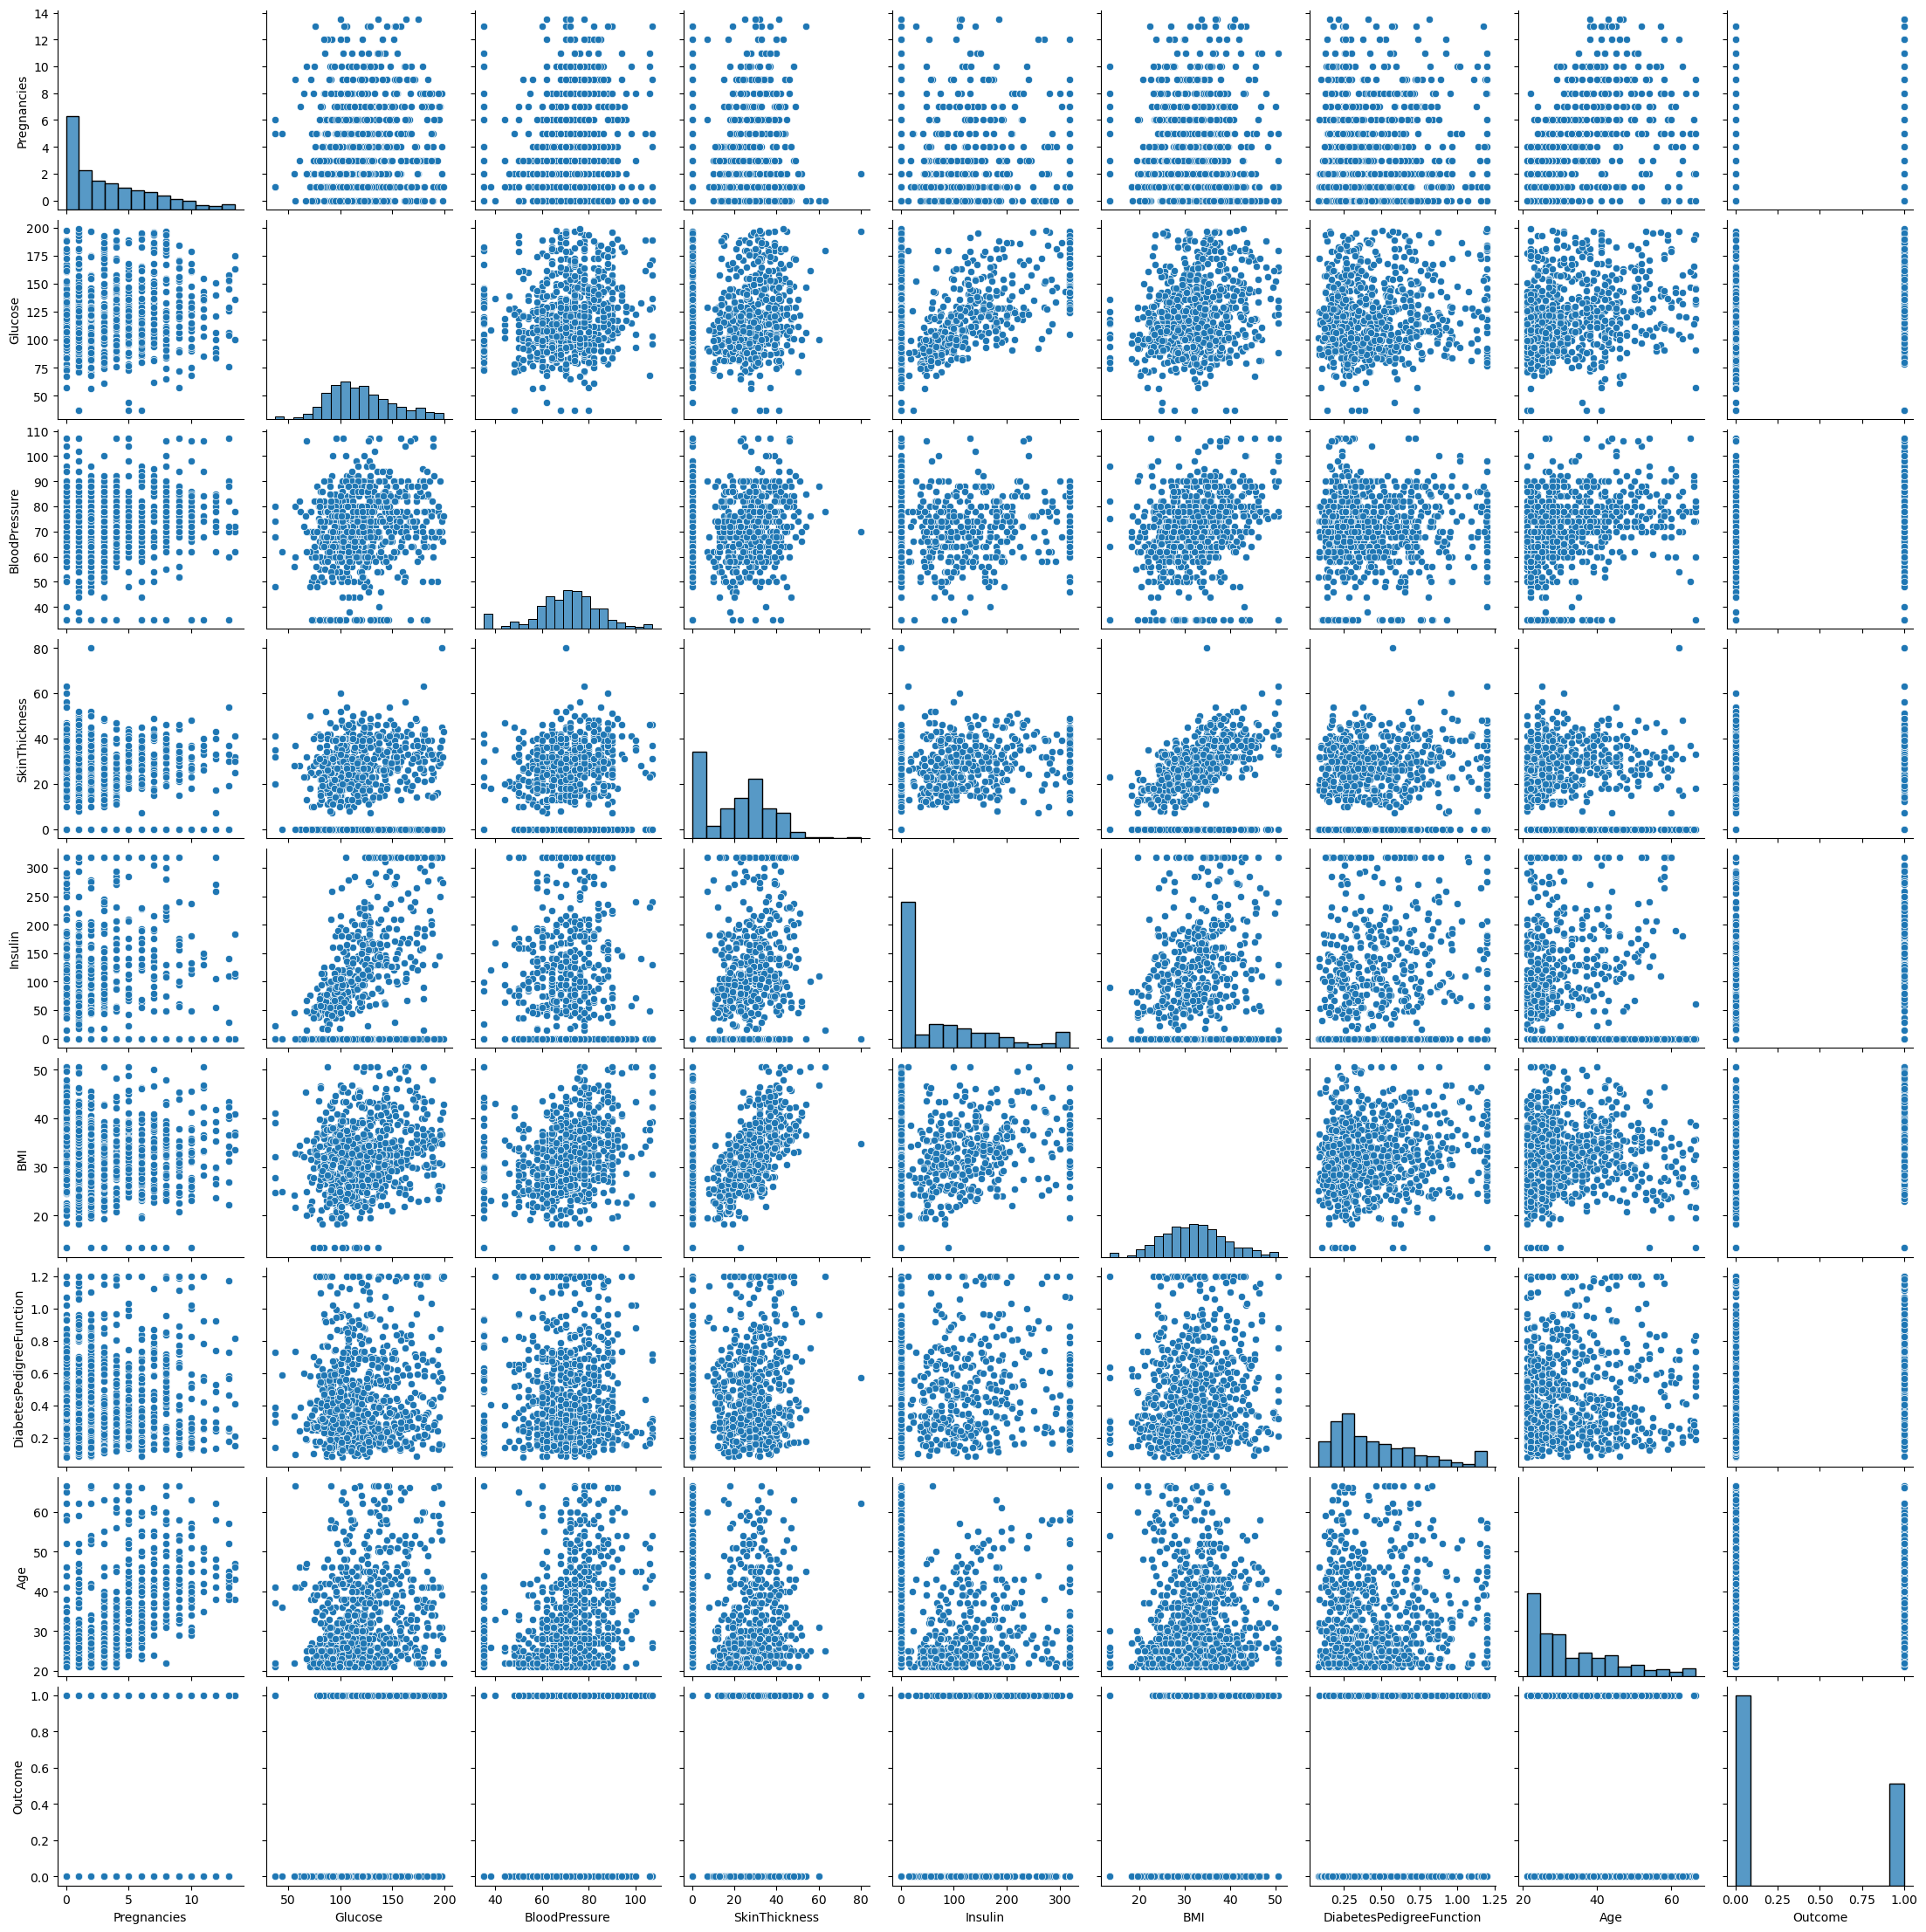

In [30]:
plt.show()

In [34]:
corr=df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128987,0.184307,-0.084349,-0.077793,0.024681,-0.017398,0.549695,0.220392
Glucose,0.128987,1.000000,0.197865,0.059806,0.315856,0.235542,0.120213,0.269056,0.479158
BloodPressure,0.184307,0.197865,1.000000,0.152644,0.050080,0.282544,0.038793,0.304208,0.113301
SkinThickness,-0.084349,0.059806,0.152644,1.000000,0.488101,0.401494,0.177920,-0.119170,0.073125
Insulin,-0.077793,0.315856,0.050080,0.488101,1.000000,0.209665,0.190087,-0.065547,0.124721
BMI,0.024681,0.235542,0.282544,0.401494,0.209665,1.000000,0.141087,0.043375,0.309739
DiabetesPedigreeFunction,-0.017398,0.120213,0.038793,0.177920,0.190087,0.141087,1.000000,0.047289,0.184969
Age,0.549695,0.269056,0.304208,-0.119170,-0.065547,0.043375,0.047289,1.000000,0.242702
Outcome,0.220392,0.479158,0.113301,0.073125,0.124721,0.309739,0.184969,0.242702,1.000000


In [35]:
sns.heatmap(corr,annot=True)


<Axes: >

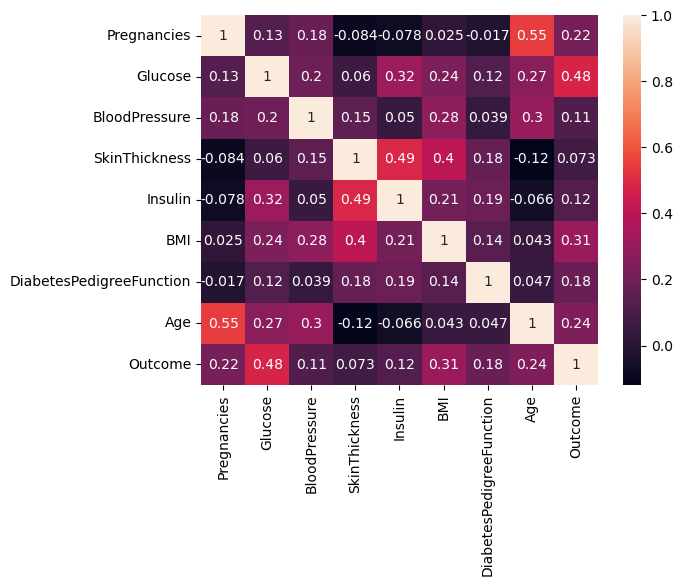

In [36]:
plt.show()

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,roc_curve

In [38]:
target=df[["Outcome"]]
features=df.drop(columns="Outcome")

In [39]:
target.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [40]:
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0


In [41]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614, 1)
(154, 1)


In [43]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
660,10.0,162.0,84.0,0.0,0.0,27.7,0.182,54.0
69,4.0,146.0,85.0,27.0,100.0,28.9,0.189,27.0
85,2.0,110.0,74.0,29.0,125.0,32.4,0.698,27.0
219,5.0,112.0,66.0,0.0,0.0,37.8,0.261,41.0
712,10.0,129.0,62.0,36.0,0.0,41.2,0.441,38.0


In [44]:
x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
173,1.0,79.0,60.0,42.0,48.0,43.5,0.678,23.0
253,0.0,86.0,68.0,32.0,0.0,35.8,0.238,25.0
207,5.0,162.0,104.0,0.0,0.0,37.7,0.151,52.0
737,8.0,65.0,72.0,23.0,0.0,32.0,0.600,42.0
191,9.0,123.0,70.0,44.0,94.0,33.1,0.374,40.0


In [46]:
log_reg=LogisticRegression()

In [48]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [49]:
b1=log_reg.coef_

In [51]:
b1

array([[ 1.75306659e-01,  3.30297612e-02, -6.45888545e-03,
        -1.29827200e-02, -2.57693547e-04,  9.19275169e-02,
         1.99239118e+00,  4.05899592e-03]])

In [52]:
b0=log_reg.intercept_

In [67]:
b0

array([-8.68810881])

In [68]:
y_pred=log_reg.predict(x_train)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [71]:
accuracy_score(y_train,y_pred)

0.7964169381107492

In [73]:
y_pred1=log_reg.predict(x_test)

In [75]:
y_pred1

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [77]:
accuracy_score(y_test,y_pred1)

0.7402597402597403

In [79]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       101
           1       0.64      0.55      0.59        53

    accuracy                           0.74       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



In [81]:
roc_auc_score(y_train,y_pred)

0.7597074080550212

In [83]:
roc_auc_score(y_test,y_pred1)

0.6943769848682981

In [85]:
sigmoid=log_reg.predict_proba(x_test)[:,1]
sigmoid

array([0.19693174, 0.05543405, 0.69953992, 0.16871381, 0.46382379,
       0.71614584, 0.97376475, 0.1224906 , 0.89613692, 0.22853992,
       0.1133155 , 0.89729653, 0.57857025, 0.4487127 , 0.68958941,
       0.3784824 , 0.11851524, 0.22861171, 0.5043569 , 0.28427317,
       0.30354281, 0.01594043, 0.52042643, 0.97710191, 0.36146464,
       0.92365133, 0.48955752, 0.32044069, 0.34021547, 0.44149302,
       0.06852717, 0.95822124, 0.23403802, 0.49028525, 0.35870991,
       0.37251481, 0.9417126 , 0.02801078, 0.18345202, 0.30205091,
       0.37870395, 0.82323907, 0.51951551, 0.14029585, 0.24533327,
       0.89382047, 0.12272032, 0.27110279, 0.90585953, 0.90891678,
       0.15937862, 0.05823561, 0.37586467, 0.70341622, 0.83504639,
       0.9413604 , 0.15972687, 0.06934388, 0.75912353, 0.13558533,
       0.17955813, 0.14325543, 0.3563867 , 0.30581485, 0.50678901,
       0.3320074 , 0.18502623, 0.03107169, 0.26818743, 0.03765503,
       0.02230354, 0.72471176, 0.10227678, 0.20387126, 0.23708

In [87]:
auc_score=roc_auc_score(y_test,sigmoid)

In [89]:
auc_score

0.777321128339249

In [91]:
fpr,tpr,thr=roc_curve(y_test,sigmoid)

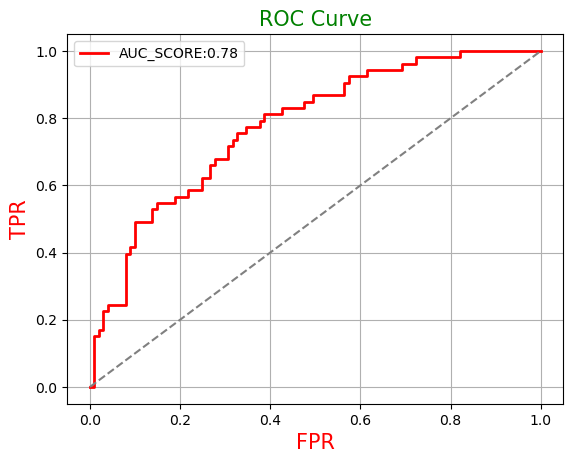

In [93]:
plt.plot(fpr,tpr,color='red',linewidth=2,label=f'AUC_SCORE:{auc_score:.2f}') # to display the auc_score in the graph
plt.plot([0,1],linestyle='--',color='grey')
plt.grid()
plt.xlabel('FPR',size=15,color='red')
plt.ylabel('TPR',size=15,color='red')
plt.title("ROC Curve",color="green",size=15)
plt.legend()
plt.show()

In [94]:
from sklearn.feature_selection import f_regression
import pickle

In [95]:
f_reg=f_regression(features,target)

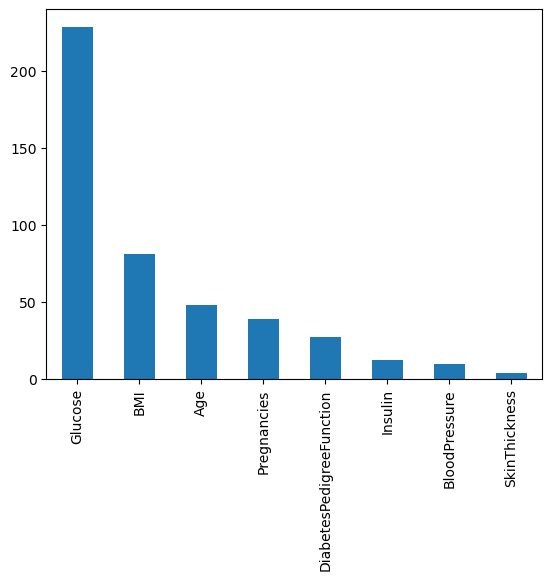

In [97]:
pd.Series(f_reg[0],index=features.columns).sort_values(ascending=False).plot(kind="bar")
plt.show()

In [102]:
### we have to predict the outcome on the basis of features.these are the respective features in this glucose is the highest graph it is the most depended towards the target,secondly BMI is the most towards the feature and respectively.skinthickness is the last and it is slightly depended towards the target

StreamLit

In [105]:
file="log.pkl"

In [107]:
pickle.dump(log_reg,open(file,'wb'))

In [32]:
### interview questions and answers

What is the difference between precision and recall?

In [35]:
## Both are evaluation metrics used to measure the performance of classification models, particularly when dealing with imbalanced datasets.
## precision:Precision measures how many of the predicted positives are actually correct.
## recall:Recall measures how many of the actual positives the model correctly identified.

What is cross-validation, and why is it important in binary classification?

In [40]:
## Cross-validation is a model evaluation technique used to assess how well a machine learning model will generalize to an independent dataset.Instead of training and testing on just one split, cross-validation splits the dataset multiple times into training and validation sets and forms the results.
## it is important for imbalanced data,overfitting risk,limited data availability